# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

Good luck & have fun! :)

In [2]:
!pip install wandb
!pip3 install pytorch_lightning torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.6/248.6 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 75.7 MB/s eta 0:00:00


**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [3]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [4]:
pip install pytorch_lightning

In [5]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm
import torchvision.models as models


In [6]:
def seed_everything(seed):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [7]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2023-11-14 19:53:12--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2023-11-14 19:53:13--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9ad1d89fd2a86a900073204215.dl.dropboxusercontent.com/cd/0/get/CHguPU2a96-QI2Gec1Rhe_GMK-QfQlQdrIHXr97yZ0FZJy2NlYZD5gOdZ14OfL4C7JcgQao5H4wZTgvIM-qQRR3uC17tK7KacuPcpjHxx9bXY-pkqBMVse7sTXjAh3bNqiU-nlg1Q0s7lM-4v828pwkv/file?dl=1# [following]
--2023-11-14 19:53:13--  https://uc9ad1d89fd2a86a900073204215.dl.dropboxusercontent.com/cd/0/get/CHguPU2a96-QI2Gec1Rhe_GMK-QfQlQdrIHXr97yZ0FZJy2NlYZD5gOdZ14OfL4C7JcgQao5H4wZTgvIM-qQRR3uC17tK7KacuPc

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [8]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)



train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [9]:
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

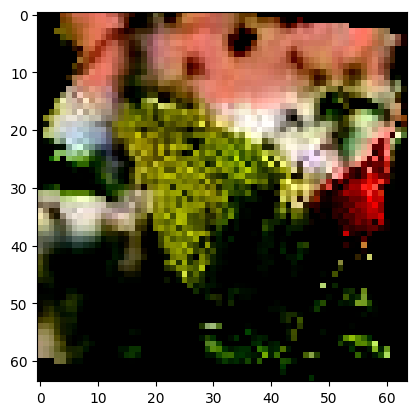

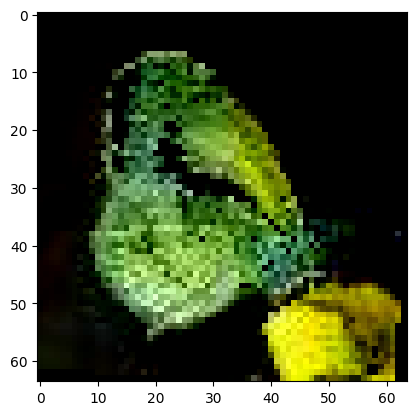

In [10]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [11]:
import torch
print(torch.cuda.is_available())


True


In [12]:
class YourNet(nn.Module):
    def __init__(self):
        super(YourNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 16 * 16, 512)
        self.fc2 = nn.Linear(512, 200)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
        self.total = 0
        self.correct = 0

    def _forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def forward(self, images, target=None):
        return self._forward(images)

    def get_accuracy(self, outputs, labels, reset=False):
        _, predicted = torch.max(outputs.data, 1)
        self.total += labels.size(0)
        self.correct += (predicted == labels).sum().item()

        if reset:
            accuracy = 100 * self.correct / self.total
            self.total = 0
            self.correct = 0
            return accuracy
        return 100 * self.correct / self.total

### Тренировочный класс lightning

In [13]:
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate=0.001):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate

    def forward(self, x):
        return self.model(x)

    def training_step(self, train_batch, batch_idx):
        images, labels = train_batch
        outputs = self(images)
        loss = F.cross_entropy(outputs, labels)
        accuracy = self.model.get_accuracy(outputs, labels)
        self.log('train_loss', loss)
        self.log('train_acc', accuracy)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, labels = val_batch
        outputs = self(images)
        loss = F.cross_entropy(outputs, labels)
        accuracy = self.model.get_accuracy(outputs, labels, reset=True)
        self.log('val_loss', loss)
        self.log('val_acc', accuracy)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)


In [14]:
wandb_logger = WandbLogger(log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = YourNet().to(device)
module = YourModule(model)



Using device: cuda


In [15]:
trainer = pl.Trainer(max_epochs=10)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params
----------------------------------
0 | model | YourNet | 8.5 M 
----------------------------------
8.5 M     Trainable params
0         Non-trainable params
8.5 M     Total params
34.044    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


### Валидация результатов задания

In [18]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    total_accuracy = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            outputs = model(images)
            acc_batch = model.get_accuracy(outputs, labels, reset=True)
            total_accuracy += acc_batch
    total_accuracy = total_accuracy / len(test_dataloader)
    return total_accuracy


In [17]:
torch.save(model.state_dict(), 'my_model.pth')

In [27]:

saved_model_path = 'my_model.pth'
model = YourNet().to(device)
model.load_state_dict(torch.load(saved_model_path, map_location=device))
model.eval()
accuracy = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * accuracy / 0.44, 0, 10):.2f} баллов")



100%|██████████| 3125/3125 [01:17<00:00, 40.31it/s]

Оценка за это задание составит 10.00 баллов


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [14]:
class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = models.resnet50(pretrained=True)
        num_ftrs = self.model.fc.in_features
        self.model.fc = nn.Linear(num_ftrs, 200)
        self.total_predictions = 0
        self.correct_predictions = 0

    def _forward(self, x):
        return self.model(x)

    def forward(self, images, target=None):
        outputs = self._forward(images)
        if target is not None:
            self._update_accuracy(outputs, target)
        return outputs

    def _update_accuracy(self, outputs, target):
        _, predicted = torch.max(outputs.data, 1)
        self.total_predictions += target.size(0)
        self.correct_predictions += (predicted == target).sum().item()

    def get_accuracy(self, outputs, labels):
        # Расчет точности
        preds = torch.argmax(outputs, dim=1)
        corrects = torch.sum(preds == labels).item()
        accuracy = corrects / labels.size(0)
        return accuracy

### Тренировочный класс lightning

In [15]:
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate=1e-4):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate

    def forward(self, x):
        return self.model(x)

    def configure_optimizers(self):
        return torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)

    def training_step(self, train_batch, batch_idx):
        images, labels = train_batch
        outputs = self(images)
        loss = F.cross_entropy(outputs, labels)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, labels = val_batch
        outputs = self(images)
        loss = F.cross_entropy(outputs, labels)
        return loss

In [16]:
wandb_logger = WandbLogger(log_model='all')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = YourNet().to(device)
module = YourModule(model)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 96.0MB/s]


In [17]:
trainer = pl.Trainer(logger=wandb_logger, accelerator="gpu" if torch.cuda.is_available() else "cpu", max_epochs=10)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: Currently logged in as: mashgorshkova (ggggggggggg57). Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params
----------------------------------
0 | model | YourNet | 23.9 M
----------------------------------
23.9 M    Trainable params
0         Non-trainable params
23.9 M    Total params
95.671    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [18]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    total_accuracy = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            outputs = model(images)
            acc_batch = model.get_accuracy(outputs, labels)
            total_accuracy += acc_batch
    return total_accuracy / len(test_dataloader)




### Валидация результатов задания

In [19]:
torch.save(model.state_dict(), 'my_model_1.pth')
saved_model_path = 'my_model_1.pth'
model.load_state_dict(torch.load(saved_model_path, map_location=device))
model.eval()
accuracy = evaluate_task(model, val_dataloader, device)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов")

100%|██████████| 3125/3125 [01:41<00:00, 30.78it/s]

Оценка за это задание составит 10.00 баллов


# Отчёт об экспериментах

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

Попытки
https://wandb.ai/ggggggggggg57/lightning_logs/reports/Untitled-Report--Vmlldzo1OTcwODY0
https://wandb.ai/ggggggggggg57/lightning_logs/reports/Untitled-Report--Vmlldzo1OTcwODcz
https://wandb.ai/ggggggggggg57/lightning_logs/reports/Untitled-Report--Vmlldzo1OTcwODg2
https://wandb.ai/ggggggggggg57/lightning_logs/reports/Untitled-Report--Vmlldzo1OTcwODk0




Задача 1
Что я пробовала:
1. Архитектура сети

Базовая CNN с небольшим количеством слоев: Начала с простой архитектуры, содержащей два-три сверточных слоя. Но она не помогла, видимо из-за того что не очень хорошо работала со сложными признаками.
Дальше я глубину увеличивала, увеличивала количество сверточных слоев и добавляла слои пакетной нормализации для улучшения обучения, немного помогло, но не идеально.

2. Аугментации Данных

Изменение Яркости и Контрастности: Пробовала аугментации, связанные с изменением яркости и контрастности изображений, но они опять проблемы не решили.

Различные Углы Вращения: Тестировала разные углы вращения (от 5 до 20 градусов). Оказалось, что вращение на 10 градусов дает наилучший компромисс между разнообразием и сохранением релевантных признаков.

3. Оптимизаторы

SGD: Использовала SGD с различными значениями скорости обучения. Иногда результаты были приемлемыми, они были менее стабильными, я пыталась их настроить нормально, но не пошло.

Adam: Adam показал лучшую производительность, особенно при использовании скорости обучения около 1e-3. Он менее чувствителен к начальным параметрам, поэтому обучать было проще

4. Размер Пакета (Batch Size)

Меньший батч: Пробовала обучать модель с меньшим рбатчем (например, 16), но это уменьшало стабильность и скорость обучения.

Больший батч: Увеличение размера пакета до 32 показало норм результаты в плане стабильности и использования ресурсов.

Итог:
1. Выбор Архитектуры Сети: СNN
2. Аугментации Данных: случайное горизонтальное отражение и случайное вращение на 10 градусов
3. Оптимизатор: Adam  


Задача 2 Что я пробовала:

1. Архитектура сети

ResNet-50: Пробовала более глубокую версию ResNet. Результаты были многообещающие, но настолько больше времени на обучение по сравнению с ResNet-18.

VGG-16: Попробвала эту архитектуру, ожидая высокой точности за счет глубины, но столкнулась с проблемой переобучения и более длительными обучением.

2. Аугментации Данных

Случайные обрезания и повороты: Пробовала комбинации случайных обрезаний и поворотов. Оказалосб, что слишком агрессивные (ррр) аугментации теряли важные признаки.

Изменение яркости и контраста: Экспериментировала и с ними чтобы улучшить способности модели справляться с различными условиями освещения. Однако, слишком большие изменения приводили к низкой производительности.

3. Размеры Изображений

Размеры: Попробовала разные размеры изображений, от 128x128 до 256x256. Идеальным оказался размер 224x224, как рекомендуется для ResNet (вау).

4. Стратегии Обучения

Дообучение всей сети: Полное дообучение сети с небольшим learning rate дало получше результаты по сравнению с замораживанием весов начальных слоев.

Замораживание начальных слоев: Пыталась заморозить веса начальных слоев и дообучить только верхние слои. Немного ускорило обучение, но точность..(

5. Оптимизаторы

Adam vs SGD: Началв с использования Adam, но также потестила SGD. Adam показал лучшую сходимость и стабильность.

Итог:
1. Предобученная модель: ResNet-18, предобученная на ImageNet.
2. Модификацияи: Заменила последний полносвязный слой ResNet на 200 классов нашего датасета.
3. Аугментации: случайное обрезание, изменение масштаба и цветовые изменения.
4. Ресайз: ресайз изображений до размера, который ожидает входной слой ResNet (224x224 пикселей).